In [7]:
import numpy as np
import pandas as pd
import math
import scipy.linalg as lin
import matplotlib.pyplot as plt

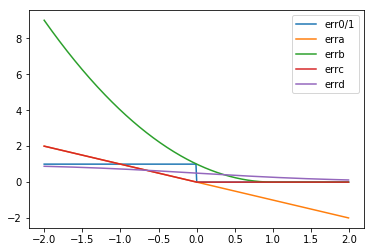

In [4]:
# Q3---4种不同的错误判据和0/1判据
z = np.arange(-2, 2, 0.01)
e0temp = z.copy()
e0temp[e0temp >= 0] = 0
e0temp[e0temp < 0] = 1
e0 = e0temp
e1 = -z.copy()
e2temp = 1-z.copy()
e2temp[e2temp < 0] = 0
e2 = np.power(e2temp, 2)
e3temp = -z.copy()
e3temp[e3temp < 0] = 0
e3 = e3temp
e4 = 1/(1+np.exp(z))
plt.plot(z, e0, label='err0/1'); plt.plot(z, e1, label='erra'); plt.plot(z, e2, label='errb')
plt.plot(z, e3, label='errc'); plt.plot(z, e4, label='errd')
plt.legend()
plt.show()

In [6]:
# Q7
u = 0; v = 0
eta = 0.01
for i in range(5):
    du = math.exp(u)+v*math.exp(u*v)+2*u-2*v-3
    dv = 2*math.exp(2*v)+u*math.exp(u*v)-2*u+4*v-2
    u -= eta*du
    v -= eta*dv
print('u=',u,'v=',v)
E = math.exp(u)+math.exp(2*v)+math.exp(u*v)+u**2-2*u*v+2*v**2-3*u-2*v
print(E)

u= 0.09413996302028127 v= 0.0017891105951028273
2.8250003566832635


In [8]:
u = 0; v = 0
uv = np.array([[0], [0]])
# eta = 0.01
for i in range(5):
    du = math.exp(u)+v*math.exp(u*v)+2*u-2*v-3
    dv = 2*math.exp(2*v)+u*math.exp(u*v)-2*u+4*v-2
    # u -= eta*du
    # v -= eta*dv
    du2 = math.exp(u)+v**2*math.exp(u*v)+2
    dv2 = 4*math.exp(2*v)+u**2*math.exp(u*v)+4
    dudv = math.exp(u*v)+v*u*math.exp(u*v)-2
    ddE = np.array([[du2, dudv], [dudv, dv2]])
    dE = np.array([[du], [dv]])
    uv = uv-lin.inv(ddE).dot(dE)
    u = uv[0, 0]
    v = uv[1, 0]
print('u and v: ',uv.T)
E = math.exp(u)+math.exp(2*v)+math.exp(u*v)+u**2-2*u*v+2*v**2-3*u-2*v
print('E: ',E)

u and v:  [[ 0.61181172  0.07049955]]
E:  2.36082334564


In [10]:
a = np.array([[1,1,1,1,1,1],[1,1,-1,1,-1,1],[1,-1,-1,1,1,1],[1,-1,1,1,-1,1],[1,0,0,0,0,0],[1,1,0,1,0,0]])
print(a)

[[ 1  1  1  1  1  1]
 [ 1  1 -1  1 -1  1]
 [ 1 -1 -1  1  1  1]
 [ 1 -1  1  1 -1  1]
 [ 1  0  0  0  0  0]
 [ 1  1  0  1  0  0]]


In [11]:
# 数据生成函数
def generateData(num):
    axeX = np.random.uniform(-1, 1, num)
    axeY = np.random.uniform(-1, 1, num)
    Xtemp = np.c_[axeX, axeY]
    X = np.c_[np.ones((num, 1)), Xtemp]
    Ytemp = np.sign(np.power(axeX, 2)+np.power(axeY, 2)-0.6)
    Ytemp[Ytemp == 0] = -1
    pos = np.random.permutation(num)
    Ytemp[pos[0: round(0.1*num)]] *= -1
    Y = Ytemp.reshape((num, 1))
    return X, Y

In [13]:
totalerr = 0
for i in range(1000):
    X, Y = generateData(1000)
    theta = lin.pinv(X.T.dot(X)).dot(X.T).dot(Y)
    ypred = np.sign(X.dot(theta))
    err = np.sum(ypred!=Y)/1000
    totalerr += err
print('Ein: ', totalerr/1000)

Ein:  0.503646


In [14]:
# 特征转换函数
def transform(X):
    row, col = X.shape
    Xback = np.zeros((row, 6))
    Xback[:, 0:col] = X
    Xback[:, col] = X[:, 1]*X[:, 2]
    Xback[:, col+1] = X[:, 1]**2
    Xback[:, col+2] = X[:, 2]**2
    return Xback

In [18]:
# Q14
totalerr = 0
for i in range(1000):
    X, Y = generateData(1000)
    Xtran = transform(X)
    theta = lin.pinv(Xtran.T.dot(Xtran)).dot(Xtran.T).dot(Y)
    Xtest, Ytest = generateData(1000)
    Xback = transform(Xtest)
    ypred = np.sign(Xback.dot(theta))
    err = np.sum(ypred!=Ytest)/1000
    totalerr += err
print('theta: ', theta.T)
print('Ein: ', totalerr/1000)

theta:  [[-1.01626639  0.07325707  0.02834912 -0.0155599   1.63387468  1.52477431]]
Ein:  0.12608


In [2]:
# sigmoid函数
def sigmoid(z):
    zback = 1/(1+np.exp(-1*z))
    return zback

In [3]:
# Logistic Regression
def logisticReg(X, Y, eta, numiter, flag=0):
    row, col = X.shape
    theta = np.zeros((col, 1))
    num = 0
    for i in range(numiter):
        if flag == 0:
            derr = (-1*X*Y).T.dot(sigmoid(-1*X.dot(theta)*Y))/row
        else:
            if num >= row:
                num = 0
            derr = -Y[num, 0]*X[num: num+1, :].T*sigmoid(-1*X[num, :].dot(theta)[0]*Y[num, 0])
            num += 1
        theta -= eta*derr
    return theta

In [4]:
# 导入数据函数
def loadData(filename):
    data = pd.read_csv(filename, sep='\s+', header=None)
    data = data.as_matrix()
    col, row = data.shape
    X = np.c_[np.ones((col, 1)), data[:, 0: row-1]]
    Y = data[:, row-1:row]
    return X, Y

In [5]:
# 误差计算函数
def mistake(X, Y, theta):
    yhat = X.dot(theta)
    yhat[yhat > 0] = 1
    yhat[yhat <= 0] = -1
    err = np.sum(yhat != Y)/len(Y)
    return err

In [8]:
X, Y = loadData('hw3_train.dat')
Xtest, Ytest = loadData('hw3_test.dat')

In [10]:
# Q18
eta = 0.001; T = 2000; flag = 0
theta = logisticReg(X, Y, eta, T, flag)
errin = mistake(X, Y, theta)
errout = mistake(Xtest, Ytest, theta)
print('Ein = ', errin,'Eout = ', errout)

Ein =  0.466 Eout =  0.475


In [11]:
# Q19
eta = 0.01; T = 2000; flag = 0
theta = logisticReg(X, Y, eta, T, flag)
errin = mistake(X, Y, theta)
errout = mistake(Xtest, Ytest, theta)
print('Ein = ', errin,'Eout = ', errout)

Ein =  0.197 Eout =  0.22


In [12]:
# Q20
eta = 0.001; T = 2000; flag = 1
theta = logisticReg(X, Y, eta, T, flag)
errin = mistake(X, Y, theta)
errout = mistake(Xtest, Ytest, theta)
print('Ein = ', errin,'Eout = ', errout)

Ein =  0.464 Eout =  0.473
